# Data Loading

In [1]:
import pandas as pd

train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [2]:
train_data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [3]:
train_data.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [4]:
train_data.dropna(axis=0,inplace=True)

# Remove emojis from Text

In [5]:
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [6]:
train_data['tweet'] = train_data['tweet'].apply(lambda x : remove_emoji(x)) 

# Tackling User handles

In [7]:
# function to remove user handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

#retain alphabets
train_data['tweet'] = train_data['tweet'].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))

#lower string
train_data['tweet'] = train_data['tweet'].str.lower()

# convert tweet into string type
train_data['tweet'] = train_data['tweet'].astype('str')

# remove user handles
train_data['tweet'] = train_data['tweet'].apply(lambda row:remove_pattern(row, "@[\w]*"))

# first five observations
train_data.head()

,tweet_id,tweet,sentiment
0,1701,sxswnui sxsw apple defining language of tou...,1
1,1851,learning ab google doodles all doodles should...,1
2,2689,one of the most in your face ex of stealing t...,2
3,4525,this iphone sxsw app would b pretty awesome i...,0
4,3604,line outside the apple store in austin waiting...,1


# Tokenizing tweets

In [8]:
%%time
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import nltk
from nltk.tokenize import TweetTokenizer


tweet_tokenizer = TweetTokenizer(preserve_case=False, reduce_len=False, strip_handles=False)

stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't",'br']+['rt','link','sxsw','form','table','apartment','rfid','mention']

# tokenize
train_data['tweet'] = [tweet_tokenizer.tokenize(x) for x in train_data['tweet']]
# train_data['tweet'] = train_data['tweet'].astype('str')

# # stopword removal
train_data['tweet'] = train_data['tweet'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
lema = WordNetLemmatizer()
train_data['tweet'] = train_data['tweet'].apply(lambda x: [lema.lemmatize(i) for i in x])
train_data['tweet'] = train_data['tweet'].apply(lambda x: ' '.join(x))
train_data.head()

Wall time: 4.75 s


,tweet_id,tweet,sentiment
0,1701,sxswnui apple defining language touch differen...,1
1,1851,learning ab google doodle doodle light funny a...,1
2,2689,one face ex stealing show yr quot apple school...,2
3,4525,iphone app would b pretty awesome crash every ...,0
4,3604,line outside apple store austin waiting new ipad,1


# Frequent Words

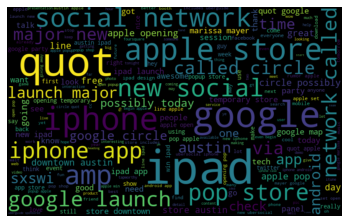

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# all the tweets
all_words = ' '.join([text for text in train_data['tweet']])

# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Frequent Words in Positive Tweets

(-0.5, 799.5, 499.5, -0.5)

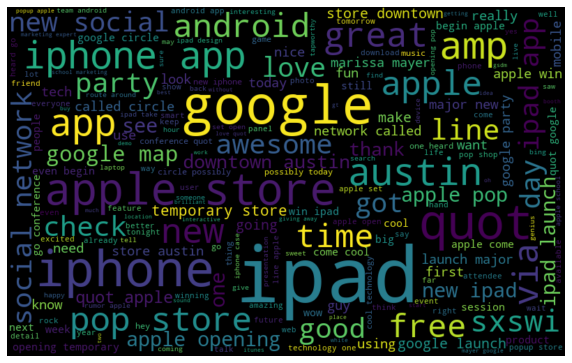

In [10]:
# positive tweets
pos_words = ' '.join([text for text in train_data['tweet'][train_data['sentiment'] == 2]])

# generate wordcloud object for positive tweets
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')

# Frequent Words in Negative Tweets

(-0.5, 799.5, 499.5, -0.5)

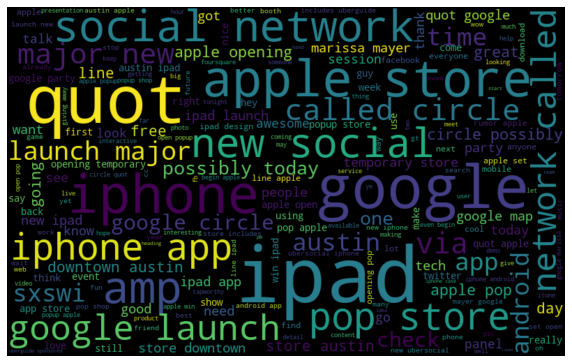

In [11]:
# negative tweets
neg_words = ' '.join([text for text in train_data['tweet'][train_data['sentiment'] == 0]])

# generate wordcloud object for negative tweets
neg_wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Frequent Words in Neutral Tweets

(-0.5, 799.5, 499.5, -0.5)

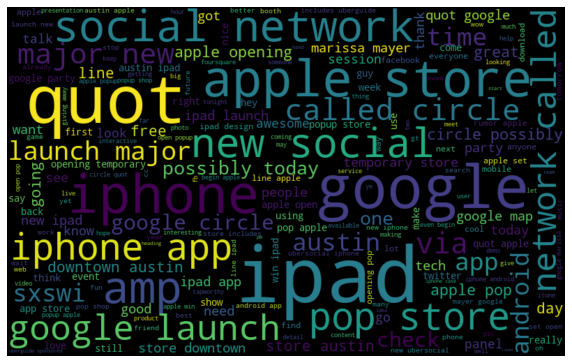

In [12]:
# neutral tweets
neutral_words = ' '.join([text for text in train_data['tweet'][train_data['sentiment'] == 1]])

# generate wordcloud object for neutral tweets
neutral_wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Frequent Words in Undetermined Tweets

(-0.5, 799.5, 499.5, -0.5)

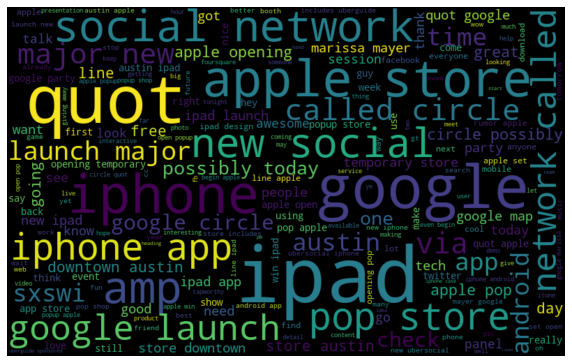

In [13]:
# neutral tweets
un_words = ' '.join([text for text in train_data['tweet'][train_data['sentiment'] == 3]])

# generate wordcloud object for neutral tweets
un_words_wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(un_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Data Preparation

In [14]:
train_data.sentiment.value_counts()

1    4310
2    2382
0     456
3     125
Name: sentiment, dtype: int64

# Removing Neutral tweets

In [15]:
train_data_pn = train_data[train_data['sentiment']!=1]
train_data_pn.shape

(2963, 3)

# Removing Undetermined tweets

In [16]:
train_data_pn = train_data_pn[train_data_pn['sentiment']!=3]
train_data_pn.shape

(2838, 3)

In [17]:
train_data_pn.head()

,tweet_id,tweet,sentiment
2,2689,one face ex stealing show yr quot apple school...,2
3,4525,iphone app would b pretty awesome crash every ...,0
8,8835,free sampler itunes freemusic,2
9,883,think might go weekend without seeing ipad cas...,2
11,2369,official buying ipad elevate,2


In [18]:
train_data_pn.sentiment.value_counts()

2    2382
0     456
Name: sentiment, dtype: int64

In [19]:
train_data_pn.sentiment = train_data_pn.sentiment.apply(lambda x : 1 if x > 0 else x)
train_data_pn.sentiment.value_counts()

1    2382
0     456
Name: sentiment, dtype: int64

# Preparing Test Data

In [20]:
#remove emoticons
test_data['tweet'] = test_data['tweet'].apply(lambda x : remove_emoji(x))

#retain alphabets
test_data['tweet'] = test_data['tweet'].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))

#lower string
test_data['tweet'] = test_data['tweet'].str.lower()

# convert tweet into string type
test_data['tweet'] = test_data['tweet'].astype('str')

# remove user handles
test_data['tweet'] = test_data['tweet'].apply(lambda row:remove_pattern(row, "@[\w]*"))

# tokenize
test_data['tweet'] = [tweet_tokenizer.tokenize(x) for x in test_data['tweet']]
# train_data['tweet'] = train_data['tweet'].astype('str')

# # stopword removal
test_data['tweet'] = test_data['tweet'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
lema = WordNetLemmatizer()
test_data['tweet'] = test_data['tweet'].apply(lambda x: [lema.lemmatize(i) for i in x])
test_data['tweet'] = test_data['tweet'].apply(lambda x: ' '.join(x))

test_data.head()

,tweet_id,tweet
0,7506,audience q prototyping tool use sketchbook sha...
1,7992,send best photo amp video citizen journalism c...
2,247,pic winning ipad unsix cc cont
3,7688,google marissa mayer mobile phone cursor physi...
4,3294,google map even cooler thought


# BoW of the train data

In [21]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

X = train_data_pn['tweet']
y = train_data_pn['sentiment']

tfidf = TfidfVectorizer(stop_words = 'english')
X_t = tfidf.fit_transform(X)
print('No of features: {}'.format(X_t.shape[1]))

No of features: 4529
Wall time: 57.9 ms


# Baseline Model and Feature Engineering

In [22]:
from sklearn.model_selection import train_test_split

predictors = X_t
target = y

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target, test_size=0.3, random_state=5)


# global X_test,Y_test

# Global Variable

In [23]:
global X_test,Y_test

# Baseline Models

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.85      1.00      0.92       340

    accuracy                           0.85       398
   macro avg       0.43      0.50      0.46       398
weighted avg       0.73      0.85      0.79       398

ROC_AUC_SCORE is 0.5


C:\Users\SHRIK\Anaconda3\envs\Python\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


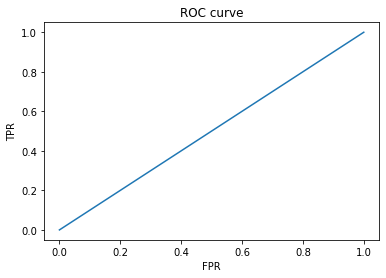

AUC Score = 50.00 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.42      0.29      0.35        58
           1       0.89      0.93      0.91       340

    accuracy                           0.84       398
   macro avg       0.66      0.61      0.63       398
weighted avg       0.82      0.84      0.83       398

ROC_AUC_SCORE is 0.6127281947261664


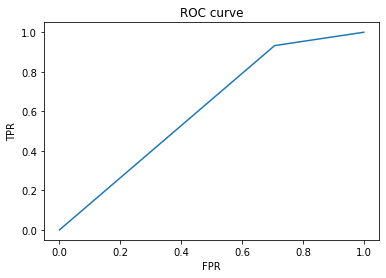

AUC Score = 61.27 %
On Model - 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        58
           1       0.87      1.00      0.93       340

    accuracy                           0.88       398
   macro avg       0.94      0.58      0.60       398
weighted avg       0.89      0.88      0.84       398

ROC_AUC_SCORE is 0.5775862068965517


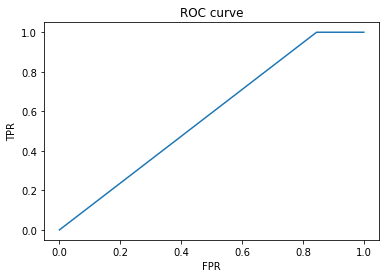

AUC Score = 57.76 %
On Model - 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.56      0.26      0.35        58
           1       0.88      0.96      0.92       340

    accuracy                           0.86       398
   macro avg       0.72      0.61      0.64       398
weighted avg       0.84      0.86      0.84       398

ROC_AUC_SCORE is 0.6116632860040567


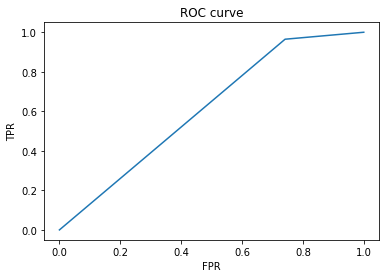

AUC Score = 61.17 %
On Model - 
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        58
           1       0.86      1.00      0.93       340

    accuracy                           0.86       398
   macro avg       0.93      0.53      0.53       398
weighted avg       0.88      0.86      0.81       398

ROC_AUC_SCORE is 

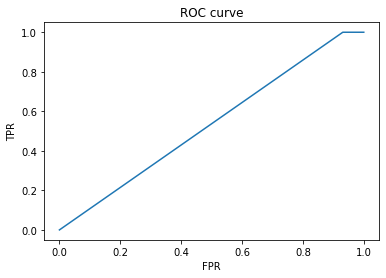

AUC Score = 53.45 %
On Model - 
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.metrics import roc_auc_score ,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings


def run_model(predictor_train,target_train, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictor_train,target_train,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

models = [LogisticRegression,DecisionTreeClassifier, RandomForestClassifier,XGBClassifier,GradientBoostingClassifier]
for model in models:
    # run model
    model = model()
    auc = run_model(X_train, Y_train, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(model))
    print('===='*20)

# Grid Search : Random Forest

In [25]:
from sklearn.model_selection import GridSearchCV


def grid_search_random_forrest(dataframe,target):
    X = dataframe
    y = target
    

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
#     'n_estimators': [11],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(x_train, y_train)
    
    return grid_search_model.best_params_

print('Best Parameters are:')
grid_search_random_forrest(X_train,Y_train)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

# Random Forest with Best Parameters

On Validation data
ROC_AUC_SCORE is 0.6122468966530372
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        79
           1       0.90      0.92      0.91       517

    accuracy                           0.84       596
   macro avg       0.63      0.61      0.62       596
weighted avg       0.83      0.84      0.83       596



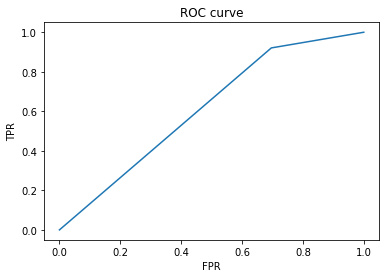

On Test data
ROC_AUC_SCORE is 0.6387323943661971
              precision    recall  f1-score   support

           0       0.45      0.37      0.40       142
           1       0.88      0.91      0.89       710

    accuracy                           0.82       852
   macro avg       0.67      0.64      0.65       852
weighted avg       0.81      0.82      0.81       852



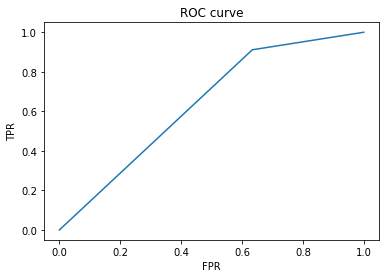

In [26]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTETomek


def grid_search_random_forrest_best(dataframe,target):
    X = dataframe
    y = target
    
    x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Applying Smote for dealing with class imbalance
    smote = SMOTETomek(random_state=42,sampling_strategy='not majority',n_jobs=-1)
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    rfc = RandomForestClassifier(max_features='auto', max_depth=4, criterion='gini')
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation data')
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    
    print('On Test data')
    y_pred = rfc.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
    
    print('ROC_AUC_SCORE is',roc_auc_score(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
grid_search_random_forrest_best(X_train,Y_train)

# XGBoost Model

On Validation Data
Accuracy is  0.8523489932885906
              precision    recall  f1-score   support

           0       0.42      0.29      0.34        79
           1       0.90      0.94      0.92       517

    accuracy                           0.85       596
   macro avg       0.66      0.61      0.63       596
weighted avg       0.83      0.85      0.84       596

ROC_AUC_SCORE is  0.6146218446245378
[[ 23  56]
 [ 32 485]]


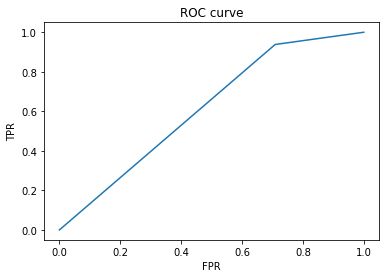

On Test Data
Accuracy is  0.8368544600938967
              precision    recall  f1-score   support

           0       0.52      0.29      0.37       142
           1       0.87      0.95      0.91       710

    accuracy                           0.84       852
   macro avg       0.69      0.62      0.64       852
weighted avg       0.81      0.84      0.82       852

ROC_AUC_SCORE is  0.6176056338028169
[[ 41 101]
 [ 38 672]]


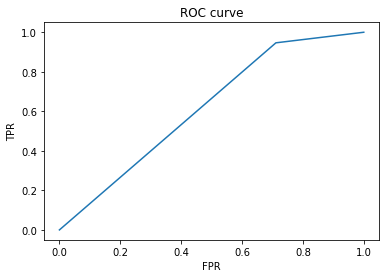

In [27]:
def xgboost(dataframe,target):
    X = dataframe
    y = target

    x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    smote = SMOTETomek(random_state=42,sampling_strategy='not majority',n_jobs=-1)
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)

    model = XGBClassifier(n_estimators=150, max_depth=4)
    model.fit(X_sm, y_sm)
    y_pred = model.predict(x_val)
    
    print('On Validation Data')
    print('Accuracy is ',model.score(x_val, y_val))
    print(classification_report(y_val, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    #     print(auc(false_positive_rate, true_positive_rate))
    
    print('ROC_AUC_SCORE is ', roc_auc_score(y_val, y_pred))
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    print(confusion_matrix(y_val,y_pred))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

    print('On Test Data')
    y_pred = model.predict(X_test)
    print('Accuracy is ',model.score(X_test, Y_test))
    print(classification_report(Y_test, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
#     print(auc(false_positive_rate, true_positive_rate))

    print('ROC_AUC_SCORE is ', roc_auc_score(Y_test, y_pred))
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    print(confusion_matrix(Y_test,y_pred))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

    
    
xgboost(X_train,Y_train)

# Final Model

In [28]:
final_model = XGBClassifier(n_estimators=150, max_depth=4)
final_model.fit(X_t,y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

# Test Data

In [29]:
test_data.head()

,tweet_id,tweet
0,7506,audience q prototyping tool use sketchbook sha...
1,7992,send best photo amp video citizen journalism c...
2,247,pic winning ipad unsix cc cont
3,7688,google marissa mayer mobile phone cursor physi...
4,3294,google map even cooler thought


# Bag of Words for test data

In [30]:
%%time

test_data_tweet = test_data['tweet']

test_data_tfidf = tfidf.transform(test_data_tweet)
print('No of features: {}'.format(test_data_tfidf.shape[1]))

No of features: 4529
Wall time: 33.9 ms


In [32]:
test_prediction = final_model.predict(test_data_tfidf)
test_data['sentiment'] = test_prediction.tolist()
test_data.head()

,tweet_id,tweet,sentiment
0,7506,audience q prototyping tool use sketchbook sha...,1
1,7992,send best photo amp video citizen journalism c...,1
2,247,pic winning ipad unsix cc cont,1
3,7688,google marissa mayer mobile phone cursor physi...,1
4,3294,google map even cooler thought,1


In [34]:
test_data.to_csv('submission.csv',index=False)